In [1]:
%reload_kedro

2023-02-10 16:08:35,388 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/guilhermepalazzo/Desktop/dev/git_repositories/crypto_msc_thesis
2023-02-10 16:08:35,674 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-02-10 16:08:35,823 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-02-10 16:08:35,825 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [40]:
import pandas as pd
import seaborn as sns

In [12]:
df_model_rpt = catalog.load("xgboost_model_reporting")
df_y_true = catalog.load("xgboost_target_test")
df_y_pred = catalog.load("xgboost_model_predict")

2023-02-10 16:12:17,192 - kedro.io.data_catalog - INFO - Loading data from `xgboost_model_reporting` (ParquetDataSet)...
2023-02-10 16:12:17,211 - kedro.io.data_catalog - INFO - Loading data from `xgboost_target_test` (ParquetDataSet)...
2023-02-10 16:12:17,219 - kedro.io.data_catalog - INFO - Loading data from `xgboost_model_predict` (ParquetDataSet)...


In [16]:
df_y_true = df_y_true.rename(columns={"label": "y_true"})

In [4]:
df_model_rpt

,runtime_brtz,accuracy,model_params,data_interval,probas
0,2023-02-10 15:45:28.790458,0.511509,"{'objective': 'binary:logistic', 'base_score':...",15m,"{1232: {'proba_label_0': 0.6583921909332275, '..."


In [5]:
probas = eval(df_model_rpt["probas"].values[0])

In [6]:
probas_df = pd.DataFrame.from_dict(data=probas, orient="index")
probas_df = probas_df.sort_index()

In [7]:
probas_df.head()

,proba_label_0,proba_label_1
7,0.878884,0.121116
9,0.917318,0.082682
11,0.467618,0.532382
13,0.458029,0.541971
20,0.661809,0.338191


In [42]:
df = probas_df.merge(df_y_true, left_index=True, right_index=True, how="inner")
assert df.shape[0] == probas_df.shape[0] == df_y_true.shape[0]
df2 = df.merge(df_y_pred, left_index=True, right_index=True, how="inner")
assert df.shape[0] == df2.shape[0]

In [43]:
df2.head()

,proba_label_0,proba_label_1,y_true,y_pred
7,0.878884,0.121116,1,0
9,0.917318,0.082682,0,0
11,0.467618,0.532382,0,1
13,0.458029,0.541971,1,1
20,0.661809,0.338191,0,0


In [44]:
df_right = df2[df2["y_true"] == df2["y_pred"]]
df_wrong = df2.drop(df_right.index)

In [45]:
df_right = df_right.drop(columns=["y_true"])
right_probas = df_right[["proba_label_0", "proba_label_1"]].max(axis=1)

<AxesSubplot: >

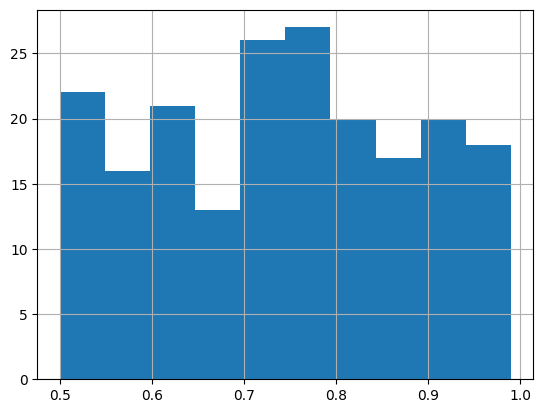

In [48]:
right_probas.hist()

In [50]:
df_wrong = df_wrong.drop(columns=["y_true"])
wrong_probas = df_wrong[["proba_label_0", "proba_label_1"]].max(axis=1)

<AxesSubplot: >

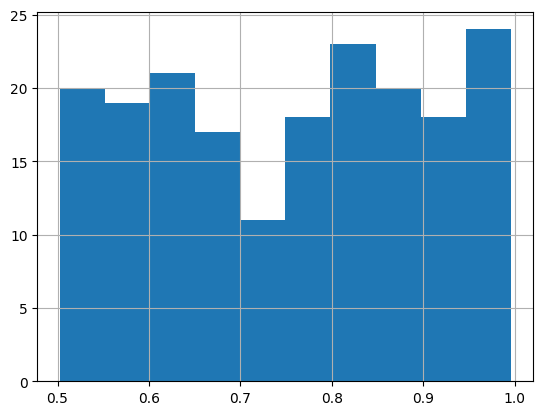

In [51]:
wrong_probas.hist()